In [2]:
!pip install tensorflow
!pip install torch

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pickle
pickle_file = open('/content/drive/MyDrive/dataframe', "rb")       
df = pickle.load(pickle_file)
pickle_file.close()
#code to load dataframe in df

In [5]:
df

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,00006903b396d50cc0037fed39916d57d50ee801,urban green space regarded contributing citize...,advantages urban green space public health urb...,191,4995,1541
1,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores rocíof menéndez co...,se calcula que en españa existen cerca de 367 ...,401,4965,1660
2,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives covid 19 outbreak uncl...,introduction objectives covid 19 outbreak uncl...,286,3482,1296
3,0001418189999fea7f7cbe3e82703d71c85a6fe5,feline infectious peritonitis virus fipv posit...,feline infectious peritonitis fip fatal chroni...,164,2049,763
4,00031cc15aafa30b187ed2cd3790e970e5046895,background sars cov 2 infection because renal ...,increased serum creatinine variable degrees pr...,98,4190,1493
...,...,...,...,...,...,...
117686,fffc2cc19b86ddf20cfda2934854909cac98667e,abbreviations arbs angiotensin receptor blocke...,following outbreak novel corona virus infectio...,92,1374,671
117687,ffff2fb21d4880b63a7cf3849cecc45bc596f4f0,prospectively compared efficacy pcr detection ...,rapid detection novel coronavirus sars cov 2 c...,111,1476,552
117688,ffff4330337614d8a69bf518f7b60652b37b14cf,protect human life science public health need ...,started innocently enough with lowgrade fever ...,52,971,569
117689,ffff73d17bc392ee68f3f16ef37d25579cb99322,studies activity rhythms pivotal management in...,invasive alien species represent main causes c...,187,3721,1323


In [6]:
len(df)

117691

In [7]:
import numpy as np 
import pandas as pd 
import json
import os
from tqdm import tqdm,tqdm_notebook
import gc

In [8]:
# Describe the New processed Dataframe
df.describe()

,abstract_word_count,body_word_count,body_unique_words
count,117691.000000,117691.000000,117691.000000
mean,230.390506,4112.043861,1286.503199
std,211.531838,5768.184488,1015.021350
min,1.000000,1.000000,1.000000
25%,140.000000,2103.000000,831.000000
50%,201.000000,3333.000000,1158.000000
75%,264.000000,5011.000000,1559.000000
max,7373.000000,277248.000000,39044.000000


In [9]:
df=df[:10000]

In [10]:
#WORD COUNT
# Count of all tokens in the columns and unique words in the columns
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
df['body_word_count'] = df['body_text'].apply(lambda x: len(x.strip().split()))  # word count in body
df['body_unique_words']=df['body_text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,00006903b396d50cc0037fed39916d57d50ee801,urban green space regarded contributing citize...,advantages urban green space public health urb...,131,3335,1078
1,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores rocíof menéndez co...,se calcula que en españa existen cerca de 367 ...,371,4776,1328
2,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives covid 19 outbreak uncl...,introduction objectives covid 19 outbreak uncl...,208,2449,953
3,0001418189999fea7f7cbe3e82703d71c85a6fe5,feline infectious peritonitis virus fipv posit...,feline infectious peritonitis fip fatal chroni...,106,1340,569
4,00031cc15aafa30b187ed2cd3790e970e5046895,background sars cov 2 infection because renal ...,increased serum creatinine variable degrees pr...,67,2874,1113
...,...,...,...,...,...,...
9995,1644fbf308a02e31d14b82539aaa9019ffdeda2f,word count 5036 words j you r n l p r e p r f ...,globally substance disorders contribute signif...,315,3158,1121
9996,16450e62e061687480a63ab5442cbd7c67c6c10d,background human infection avian influenza h7n...,human infection avian influenza h7n9 virus acu...,156,1114,465
9997,164537bd006752a7047ab5050b98ab8c305db666,background covid 19 pandemic pressured medical...,conclusion order plan future need understand d...,202,3009,1208
9998,16453f5d3abdd2afec0f895e734c26e3d39a578f,cryopreservation sperm embryos useful efficien...,genetically engineered mouse powerful tool elu...,77,1278,577


In [11]:
# Check if NULL values are present in the dataset along with count of the NULL values
for col in df.columns:
    print(col, df[col].isnull().sum())

paper_id 0
abstract 0
body_text 0
abstract_word_count 0
body_word_count 0
body_unique_words 0


In [12]:
#Drop Null Values
df.drop(df.index[df['abstract_word_count'] == 0], inplace = True)
df.drop(df.index[df['body_word_count'] == 0], inplace = True)
# df = df.loc[~((df['abstract_word_count'] == 0) | (df['body_word_count'] == 0))]
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,00006903b396d50cc0037fed39916d57d50ee801,urban green space regarded contributing citize...,advantages urban green space public health urb...,131,3335,1078
1,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores rocíof menéndez co...,se calcula que en españa existen cerca de 367 ...,371,4776,1328
2,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives covid 19 outbreak uncl...,introduction objectives covid 19 outbreak uncl...,208,2449,953
3,0001418189999fea7f7cbe3e82703d71c85a6fe5,feline infectious peritonitis virus fipv posit...,feline infectious peritonitis fip fatal chroni...,106,1340,569
4,00031cc15aafa30b187ed2cd3790e970e5046895,background sars cov 2 infection because renal ...,increased serum creatinine variable degrees pr...,67,2874,1113
...,...,...,...,...,...,...
9995,1644fbf308a02e31d14b82539aaa9019ffdeda2f,word count 5036 words j you r n l p r e p r f ...,globally substance disorders contribute signif...,315,3158,1121
9996,16450e62e061687480a63ab5442cbd7c67c6c10d,background human infection avian influenza h7n...,human infection avian influenza h7n9 virus acu...,156,1114,465
9997,164537bd006752a7047ab5050b98ab8c305db666,background covid 19 pandemic pressured medical...,conclusion order plan future need understand d...,202,3009,1208
9998,16453f5d3abdd2afec0f895e734c26e3d39a578f,cryopreservation sperm embryos useful efficien...,genetically engineered mouse powerful tool elu...,77,1278,577


In [13]:
# Converting strings to Lower case
df["abstract"] = df["abstract"].str.lower() 
df["body_text"] = df["body_text"].str.lower() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
#Remove stop words
import nltk
nltk.download('stopwords')
stopwords_custom = nltk.corpus.stopwords.words('english')
customize_stop_words = ['common','review','describes','abstract','retrospective','chart','patients','study','may',
                        'associated','results','including','high''found','one','well','among','Abstract','provide',
                        'objective','objective:','background','range','features','participates','doi', 'preprint', 
                        'copyright', 'org', 'https', 'et ','et' 'al', 'author', 'figure', 'table', 'rights', 'reserved', 
                        'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 
                        'Elsevier', 'PMC', 'CZI']
### append custom stopwords to default stopwords from NLTK
for i in customize_stop_words:
    stopwords_custom.append(i)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
df['abstract'] = df['abstract'].apply(lambda x: " ".join([word for word in x.split() if word not in (stopwords_custom)]))
df['body_text'] = df['body_text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stopwords_custom)]))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,00006903b396d50cc0037fed39916d57d50ee801,urban green space regarded contributing citize...,advantages urban green space public health urb...,131,3335,1078
1,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores rocíof menéndez co...,se calcula que en españa existen cerca de 367 ...,371,4776,1328
2,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives covid 19 outbreak uncl...,introduction objectives covid 19 outbreak uncl...,208,2449,953
3,0001418189999fea7f7cbe3e82703d71c85a6fe5,feline infectious peritonitis virus fipv posit...,feline infectious peritonitis fip fatal chroni...,106,1340,569
4,00031cc15aafa30b187ed2cd3790e970e5046895,sars cov 2 infection renal involvement severe ...,increased serum creatinine variable degrees pr...,67,2874,1113
...,...,...,...,...,...,...
9995,1644fbf308a02e31d14b82539aaa9019ffdeda2f,word count 5036 words j r n l p r e p r f jour...,globally substance disorders contribute signif...,315,3158,1121
9996,16450e62e061687480a63ab5442cbd7c67c6c10d,human infection avian influenza h7n9 virus acu...,human infection avian influenza h7n9 virus acu...,156,1114,465
9997,164537bd006752a7047ab5050b98ab8c305db666,covid 19 pandemic pressured medical schools gl...,conclusion order plan future need understand d...,202,3009,1208
9998,16453f5d3abdd2afec0f895e734c26e3d39a578f,cryopreservation sperm embryos useful efficien...,genetically engineered mouse powerful tool elu...,77,1278,577


In [16]:
#Remove contractions
#Install for first time
!pip install contractions

     |████████████████████████████████| 327kB 7.3MB/s 
     |████████████████████████████████| 266kB 7.9MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=85264 sha256=e3542ef300fa3d4bba3e5cadfc5dac78e3bb27ecaef93f857094600874bc599f
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick


In [17]:
import contractions
df['abstract'] = df['abstract'].apply(lambda x: " ".join([contractions.fix(word) for word in x.split()]))
df['body_text'] = df['body_text'].apply(lambda x: " ".join([contractions.fix(word) for word in x.split()]))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,00006903b396d50cc0037fed39916d57d50ee801,urban green space regarded contributing citize...,advantages urban green space public health urb...,131,3335,1078
1,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores rocíof menéndez co...,se calcula que en españa existen cerca de 367 ...,371,4776,1328
2,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives covid 19 outbreak uncl...,introduction objectives covid 19 outbreak uncl...,208,2449,953
3,0001418189999fea7f7cbe3e82703d71c85a6fe5,feline infectious peritonitis virus fipv posit...,feline infectious peritonitis fip fatal chroni...,106,1340,569
4,00031cc15aafa30b187ed2cd3790e970e5046895,sars cov 2 infection renal involvement severe ...,increased serum creatinine variable degrees pr...,67,2874,1113
...,...,...,...,...,...,...
9995,1644fbf308a02e31d14b82539aaa9019ffdeda2f,word count 5036 words j r n l p r e p r f jour...,globally substance disorders contribute signif...,315,3158,1121
9996,16450e62e061687480a63ab5442cbd7c67c6c10d,human infection avian influenza h7n9 virus acu...,human infection avian influenza h7n9 virus acu...,156,1114,465
9997,164537bd006752a7047ab5050b98ab8c305db666,covid 19 pandemic pressured medical schools gl...,conclusion order plan future need understand d...,202,3009,1208
9998,16453f5d3abdd2afec0f895e734c26e3d39a578f,cryopreservation sperm embryos useful efficien...,genetically engineered mouse powerful tool elu...,77,1278,577


In [18]:
#Remove punctuations
from nltk.tokenize import RegexpTokenizer
tokenizer_pattern = RegexpTokenizer('\w+')
df['abstract'] = df['abstract'].apply(lambda x: " ".join(tokenizer_pattern.tokenize(x.lower())))
df['body_text'] = df['body_text'].apply(lambda x: " ".join(tokenizer_pattern.tokenize(x.lower())))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,00006903b396d50cc0037fed39916d57d50ee801,urban green space regarded contributing citize...,advantages urban green space public health urb...,131,3335,1078
1,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores rocíof menéndez co...,se calcula que en españa existen cerca de 367 ...,371,4776,1328
2,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives covid 19 outbreak uncl...,introduction objectives covid 19 outbreak uncl...,208,2449,953
3,0001418189999fea7f7cbe3e82703d71c85a6fe5,feline infectious peritonitis virus fipv posit...,feline infectious peritonitis fip fatal chroni...,106,1340,569
4,00031cc15aafa30b187ed2cd3790e970e5046895,sars cov 2 infection renal involvement severe ...,increased serum creatinine variable degrees pr...,67,2874,1113
...,...,...,...,...,...,...
9995,1644fbf308a02e31d14b82539aaa9019ffdeda2f,word count 5036 words j r n l p r e p r f jour...,globally substance disorders contribute signif...,315,3158,1121
9996,16450e62e061687480a63ab5442cbd7c67c6c10d,human infection avian influenza h7n9 virus acu...,human infection avian influenza h7n9 virus acu...,156,1114,465
9997,164537bd006752a7047ab5050b98ab8c305db666,covid 19 pandemic pressured medical schools gl...,conclusion order plan future need understand d...,202,3009,1208
9998,16453f5d3abdd2afec0f895e734c26e3d39a578f,cryopreservation sperm embryos useful efficien...,genetically engineered mouse powerful tool elu...,77,1278,577


In [19]:
df = df.reset_index(drop=True)
df

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,00006903b396d50cc0037fed39916d57d50ee801,urban green space regarded contributing citize...,advantages urban green space public health urb...,131,3335,1078
1,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores rocíof menéndez co...,se calcula que en españa existen cerca de 367 ...,371,4776,1328
2,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives covid 19 outbreak uncl...,introduction objectives covid 19 outbreak uncl...,208,2449,953
3,0001418189999fea7f7cbe3e82703d71c85a6fe5,feline infectious peritonitis virus fipv posit...,feline infectious peritonitis fip fatal chroni...,106,1340,569
4,00031cc15aafa30b187ed2cd3790e970e5046895,sars cov 2 infection renal involvement severe ...,increased serum creatinine variable degrees pr...,67,2874,1113
...,...,...,...,...,...,...
9983,1644fbf308a02e31d14b82539aaa9019ffdeda2f,word count 5036 words j r n l p r e p r f jour...,globally substance disorders contribute signif...,315,3158,1121
9984,16450e62e061687480a63ab5442cbd7c67c6c10d,human infection avian influenza h7n9 virus acu...,human infection avian influenza h7n9 virus acu...,156,1114,465
9985,164537bd006752a7047ab5050b98ab8c305db666,covid 19 pandemic pressured medical schools gl...,conclusion order plan future need understand d...,202,3009,1208
9986,16453f5d3abdd2afec0f895e734c26e3d39a578f,cryopreservation sperm embryos useful efficien...,genetically engineered mouse powerful tool elu...,77,1278,577


In [20]:
#Install it for first time
!pip install wordcloud

In [21]:
#Word cloud
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

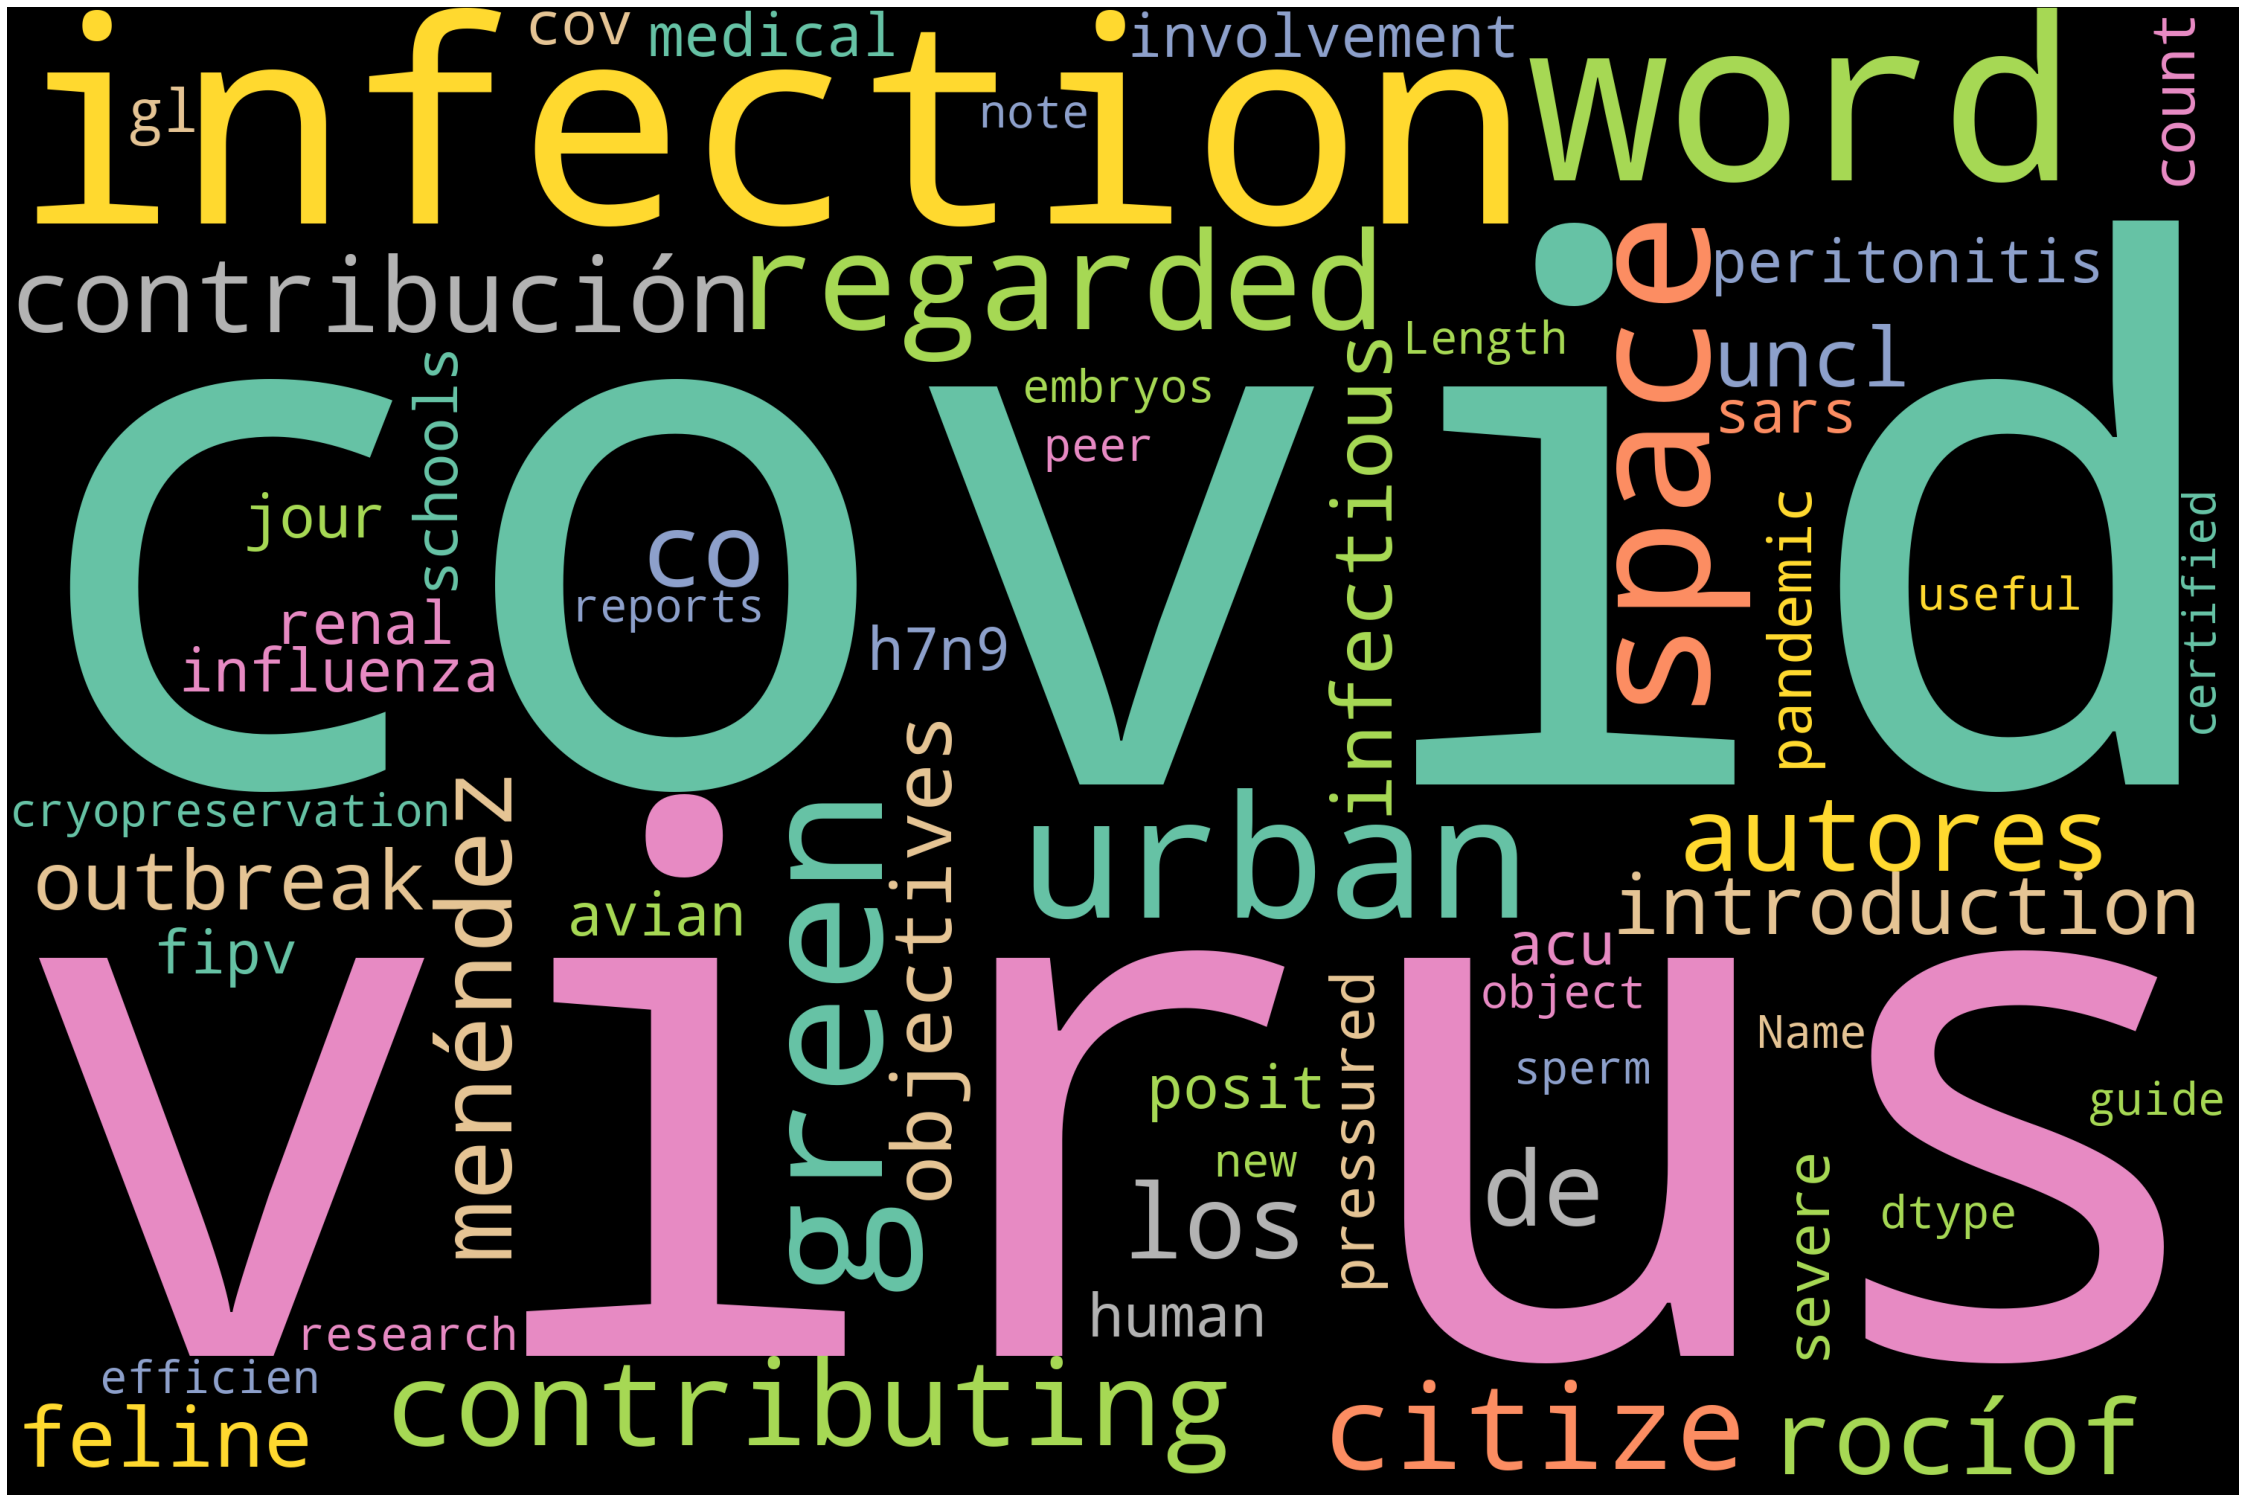

In [22]:
#ABSTRACT WORDCLOUD
abstract_text = str(df.abstract)

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stopwords_custom).generate(abstract_text)
# Plot
plot_cloud(wordcloud)

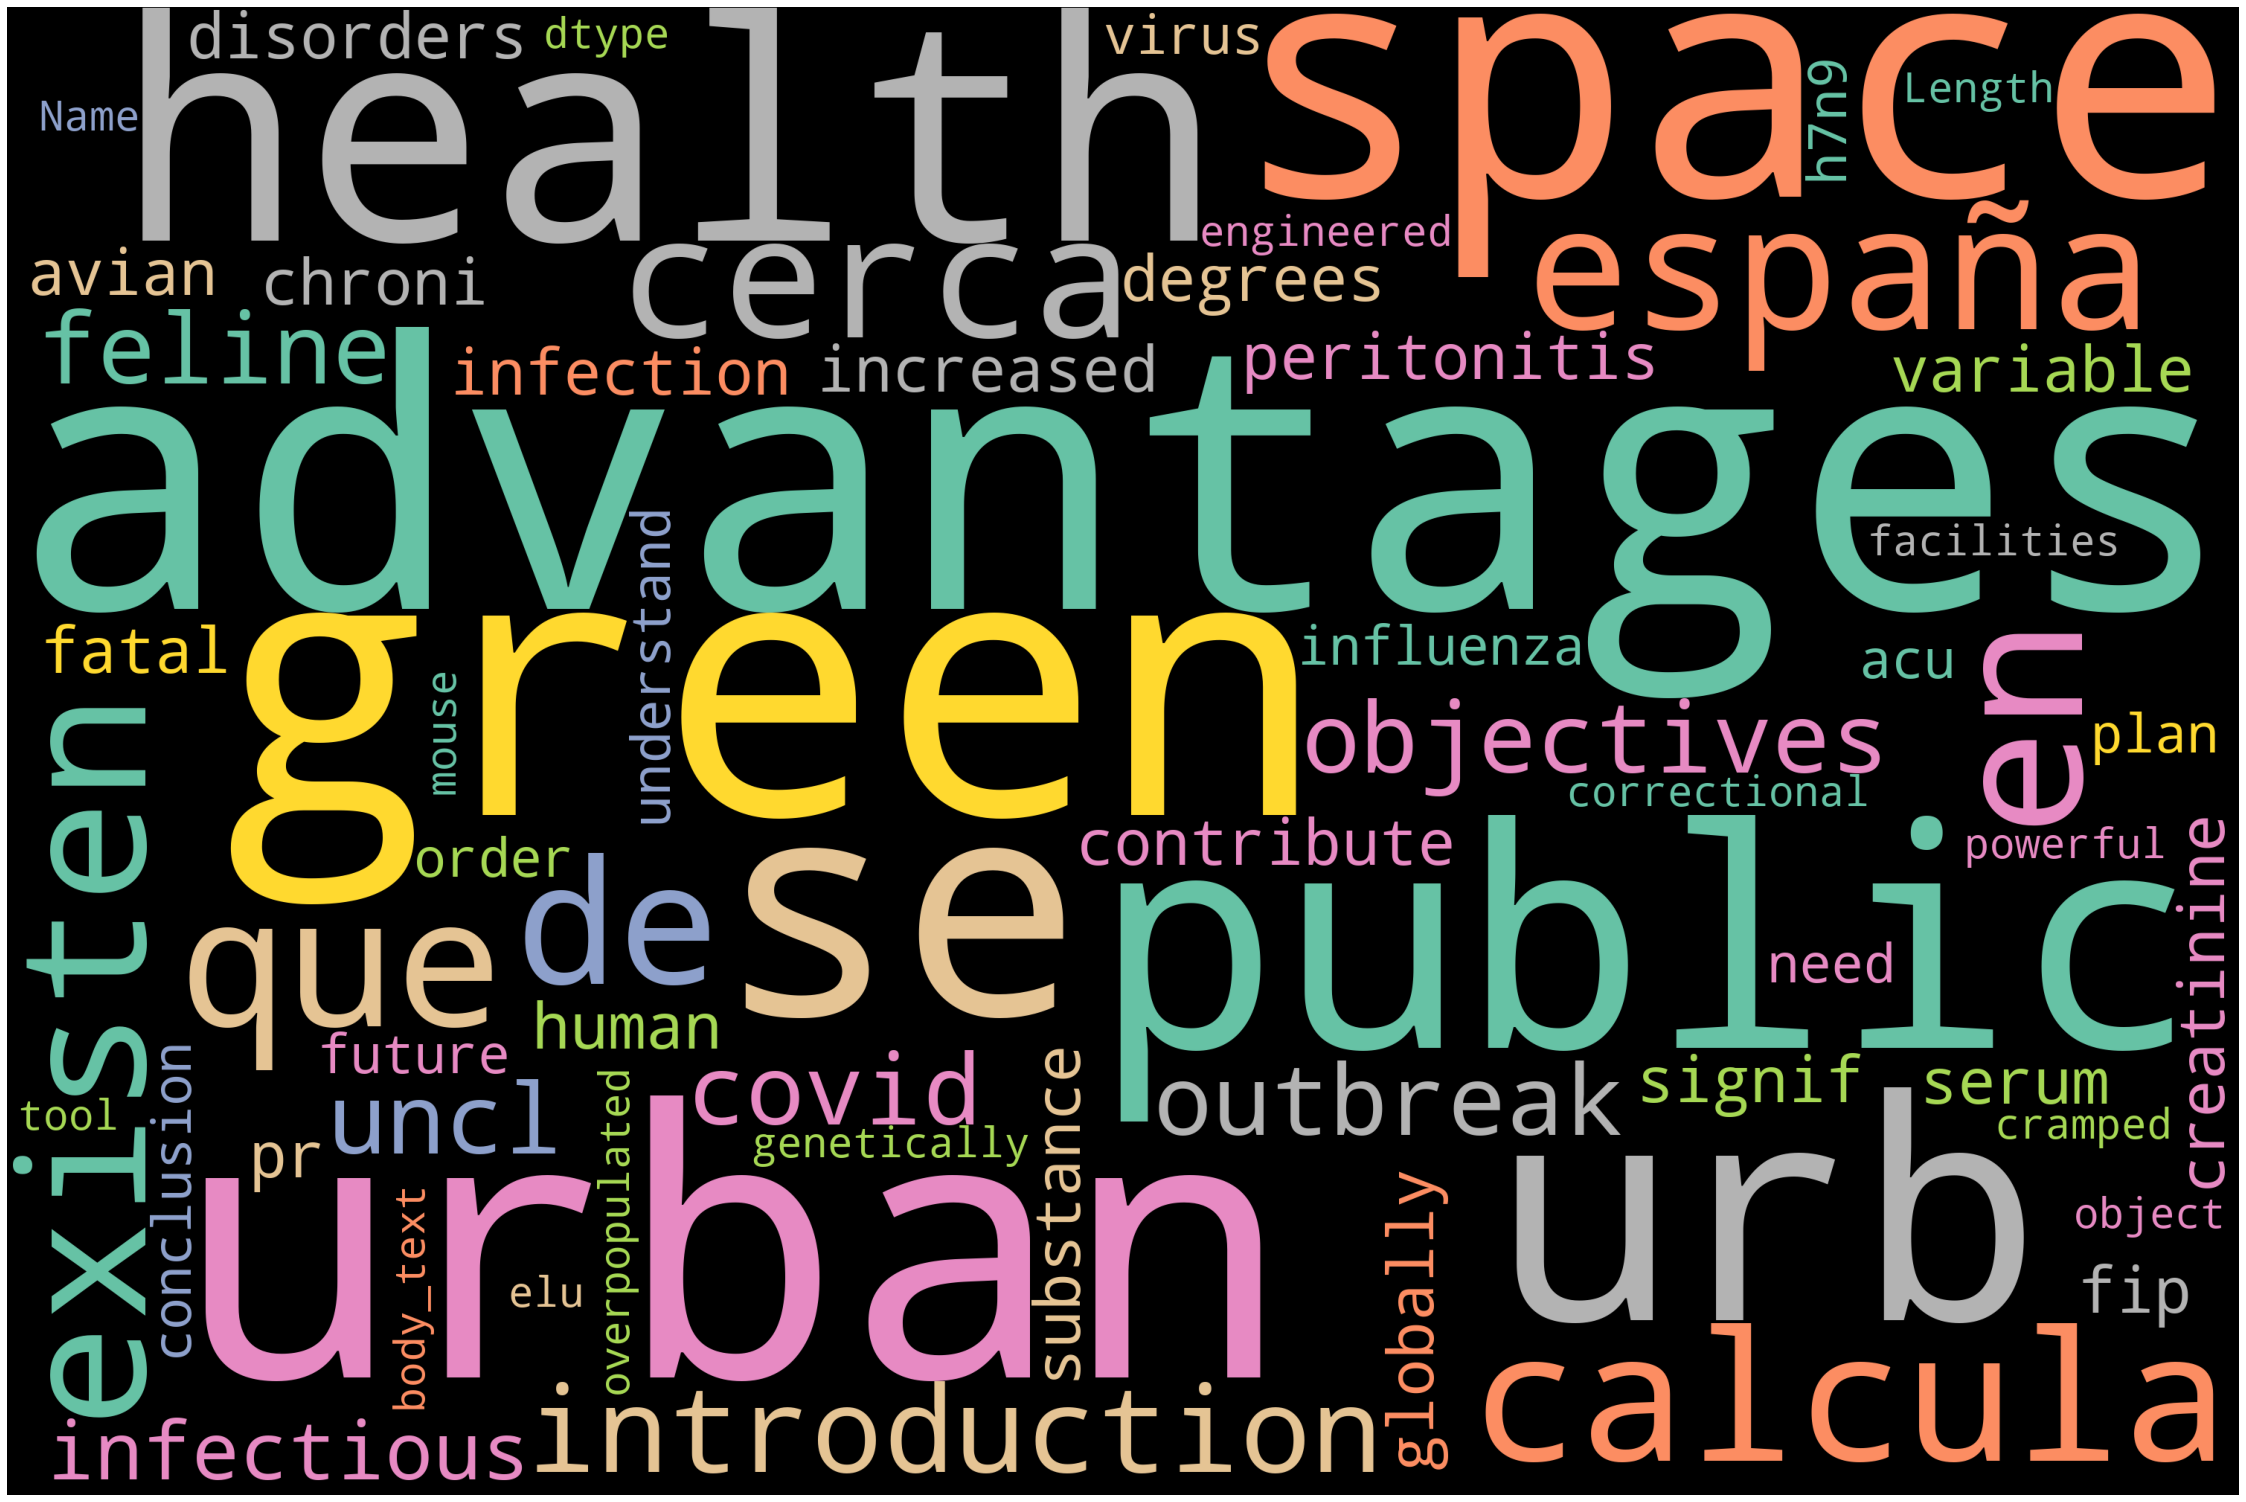

In [23]:
#BODY WORD CLOUD
text = str(df.body_text)

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stopwords_custom).generate(text)
# Plot
plot_cloud(wordcloud)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


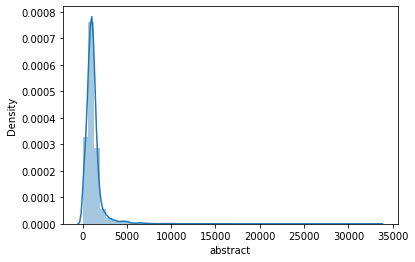

In [25]:
headline_length=df['abstract'].str.len()
sns.distplot(headline_length)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


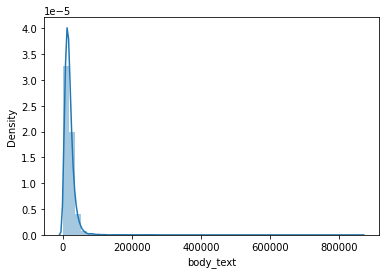

In [26]:
headline_length=df['body_text'].str.len()
sns.distplot(headline_length)
plt.show()

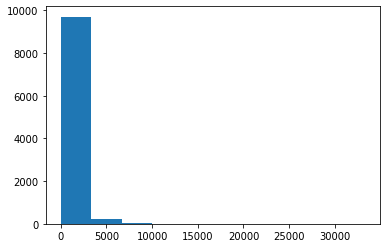

In [27]:
headline_length=df['abstract'].str.len()
plt.hist(headline_length)
plt.show()

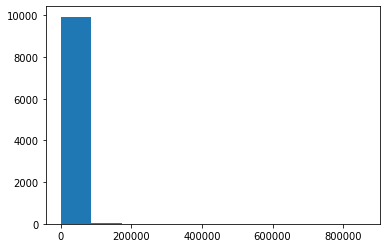

In [28]:
headline_length=df['body_text'].str.len()
plt.hist(headline_length)
plt.show()

In [29]:
from nltk.corpus import stopwords

In [30]:
stop=set(stopwords.words('english'))

def build_list(df,col="abstract"):
    corpus=[]
    lem=WordNetLemmatizer()
    stop=set(stopwords.words('english'))
    new= df[col].dropna().str.split()
    new=new.values.tolist()
    corpus=[lem.lemmatize(word.lower()) for i in new for word in i if(word) not in stop]
    
    return corpus

In [31]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

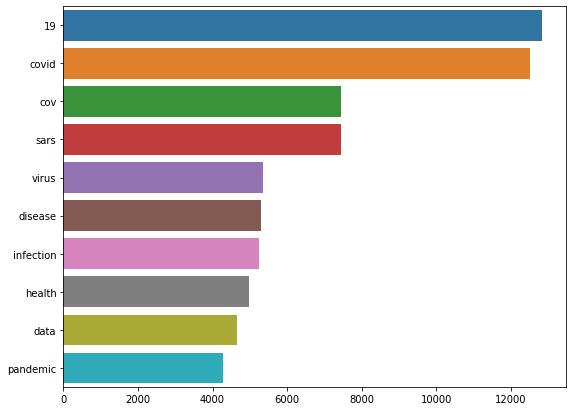

In [33]:
top_n_unigrams=get_top_ngram(df['abstract'].dropna(),1)[:10000]
x,y=map(list,zip(*top_n_unigrams))
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)

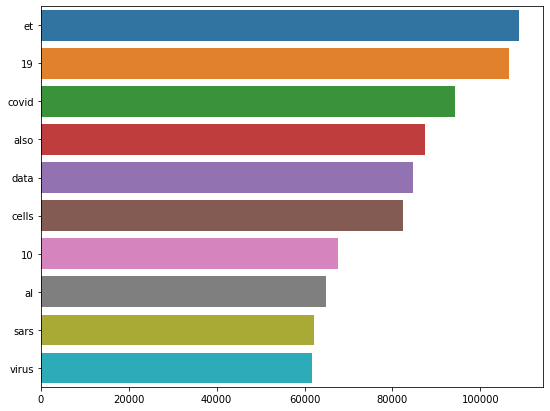

In [34]:
top_n_unigrams=get_top_ngram(df['body_text'].dropna(),1)[:10000]
x,y=map(list,zip(*top_n_unigrams))
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)

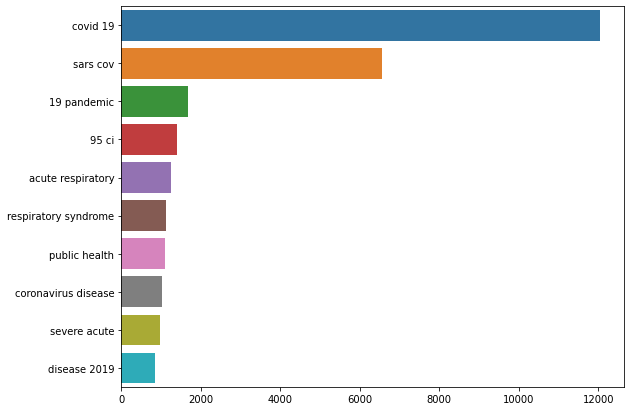

In [35]:
top_n_bigrams=get_top_ngram(df['abstract'].dropna(),2)[:10000]
x,y=map(list,zip(*top_n_bigrams))
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)

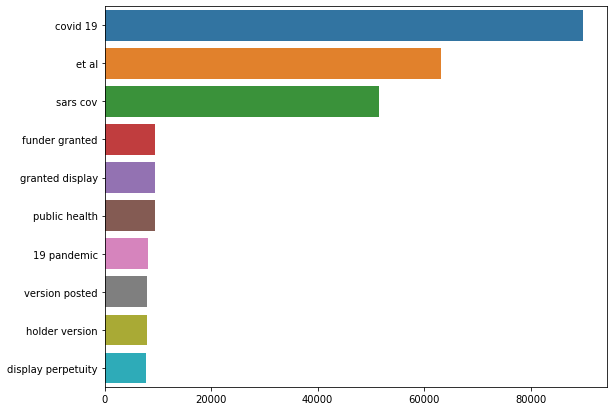

In [36]:
top_n_bigrams=get_top_ngram(df['body_text'].dropna(),2)[:10000]
x,y=map(list,zip(*top_n_bigrams))
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)

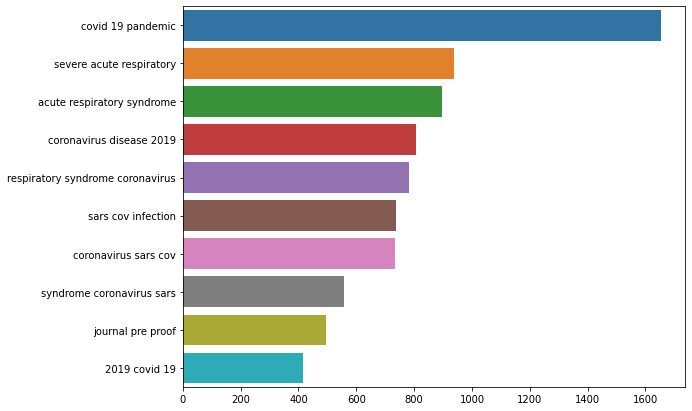

In [37]:
top_tri_grams=get_top_ngram(df['abstract'].dropna(),n=3)
x,y=map(list,zip(*top_tri_grams))
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)

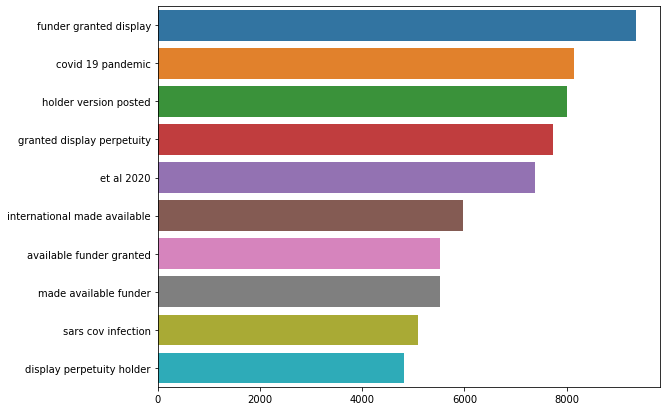

In [38]:
top_tri_grams=get_top_ngram(df['body_text'].dropna(),n=3)
x,y=map(list,zip(*top_tri_grams))
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)

In [39]:
!pip install rank_bm25

In [40]:
from rank_bm25 import BM25Okapi


In [41]:
def flatten(x):
    result = []
    for el in x:
        if hasattr(el, "__iter__") and not isinstance(el, str):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result

In [42]:
tokenized_corpus = [doc.split(" ") for doc in df['abstract'][:10000]]
tokenized_corpus=flatten(tokenized_corpus)
bm25 = BM25Okapi(tokenized_corpus)
tokenized1=tokenized_corpus
print(len(tokenized_corpus))

1556162


In [43]:
def search(search_tokens, num_results=10):
    scores = bm25.get_scores(search_tokens)
    top_indexes = np.argsort(scores)[::-1][:num_results]
    
    return top_indexes,scores

In [44]:
tokenized_query='according to china'

In [45]:
top_indexes,scores=search(tokenized_query)

In [46]:
top_indexes

array([1341900,  198503,  126694,  126532, 1067328, 1160458,  126653,
       1034859,  477840,  589072])

In [47]:
bm25.get_top_n(tokenized_query, tokenized_corpus, n=1)

['hochgradig']

In [48]:
import pickle
#actual model is MODEL_1
name1 = 'pickle1_baseline-2'
pickle_file1 = open(name1, "wb")       
pickle.dump(tokenized1,pickle_file1)

pickle_file1.close()
#code to dump the model

In [49]:
f1=open(name1,'rb')
tokenized2=pickle.load(f1)
tokenized_corpus=flatten(tokenized_corpus)
bm25 = BM25Okapi(tokenized_corpus)
print(len(tokenized_corpus))

1556162


In [50]:
def search(search_tokens, num_results=10):
    scores = bm25.get_scores(search_tokens)
    top_indexes = np.argsort(scores)[::-1][:num_results]
    
    return top_indexes,scores

In [51]:
tokenized_query='according to china'
top_indexes,scores=search(tokenized_query)
print(bm25.get_top_n(tokenized_query, tokenized_corpus, n=1))
print(top_indexes)

['hochgradig']
[1341900  198503  126694  126532 1067328 1160458  126653 1034859  477840
  589072]


In [52]:
!pip install sentence_transformers

     |████████████████████████████████| 81kB 4.4MB/s 
     |████████████████████████████████| 2.0MB 11.9MB/s 
     |████████████████████████████████| 1.2MB 35.4MB/s 
     |████████████████████████████████| 3.2MB 47.9MB/s 
     |████████████████████████████████| 890kB 40.0MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.0.3-cp37-none-any.whl size=114277 sha256=b3adee195e4f78bd31e5022d1dd7b8858d25eced3cd0dfa7e2acad5747957309
  Stored in directory: /root/.cache/pip/wheels/c8/0d/fa/4e28cf045da4781344e7972befb2fdf306051b225bfc290187
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=195f7878328be2f6ee31572a2949ae4a5ca2971e29d6ffc7d7afed20209239bb
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [53]:
import numpy as np
import pandas as pd
import scipy as sc

import os
import json
import warnings

from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

warnings.filterwarnings("ignore")
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [54]:
question_embedding = model.encode(['What do we know about virus genetics, origin, and evolution?'])

queries = ['What is known about transmission, incubation, and environmental stability?', 'What do we know about COVID-19 risk factors?', 
           'What do we know about virus genetics, origin, and evolution?', 'What do we know about vaccines and therapeutics?',
           'Are there geographic variations in the rate of COVID-19 spread?', 'Are there geographic variations in the mortality rate of COVID-19?',
           'Is there any evidence to suggest geographic based virus mutations?','What do we know about diagnostics and surveillance?',
           'What do we know about non-pharmaceutical interventions?','What has been published about medical care?',
           'What has been published about ethical and social science considerations?', 'What has been published about information sharing and inter-sectoral collaboration?']

query_embeddings = model.encode(queries)

In [55]:

abstract_embeddings = model.encode(df['abstract'])
model_2 = abstract_embeddings


In [56]:

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = sc.spatial.distance.cdist([query_embedding], abstract_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(df['abstract'][idx].strip(), "\n(Score: %.4f)" % (1-distance),"\n")





Query: What is known about transmission, incubation, and environmental stability?

Top 5 most similar sentences in corpus:
health individual population general result interaction genetics various environmental factors diet nutrition important 
(Score: 0.6359) 

highlights prudent eu agricultural policy reform could greatly benefit sustainability eu agricultural subsidies currently spent needed support environment climate friendly practices required result based payments better monitoring outcomes necessary 
(Score: 0.6335) 

also thank dso environmental detection team clinical diagnostics team bsl3 sample processing analysis logistics repository team transport biohazard material inventory safekeeping received items financial support 
(Score: 0.5864) 

food safety 
(Score: 0.5796) 

feed wastes waste water treatment plants major sources entry n oxides soils aquatic life complexation actinides potentially stable anthropogenic ligands facilitate transportation migration actinides sour

In [57]:
question_abstract = []
bert_scores = []

for abstract_embedding, abstract_text in zip(abstract_embeddings, df['abstract']):
    bert_score = cosine_similarity([question_embedding[0], abstract_embedding])[1][0]
    question_abstract.append(bert_score)

In [58]:
print("Index of the document: ", question_abstract.index(max(question_abstract)), "\nAbstract of the document: ", df['abstract'].iloc[question_abstract.index(max(question_abstract))],
     "\nBert Similarity between the question and the document: ", max(question_abstract))

Index of the document:  9163 
Abstract of the document:  lecture covers three main topics viruses properties place living world possible origin ii molecular basis viral variability evolution iii evolution viral pathogenicity emerging viral infections 
Bert Similarity between the question and the document:  0.76086986


In [59]:
import pickle
#actual model is MODEL_1
name = 'pickle2_baseline-2'
pickle_file = open(name, "wb")       
pickle.dump(model,pickle_file)
pickle.dump(model_2,pickle_file)
pickle.dump(df,pickle_file)
pickle_file.close()
#code to dump the model

In [60]:
f=open(name,'rb')
model_work=pickle.load(f)
model_3=pickle.load(f)

In [61]:
abstract_embeddings = model_3
closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = sc.spatial.distance.cdist([query_embedding], abstract_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(df['abstract'][idx].strip(), "\n(Score: %.4f)" % (1-distance),"\n")





Query: What is known about transmission, incubation, and environmental stability?

Top 5 most similar sentences in corpus:
health individual population general result interaction genetics various environmental factors diet nutrition important 
(Score: 0.6359) 

highlights prudent eu agricultural policy reform could greatly benefit sustainability eu agricultural subsidies currently spent needed support environment climate friendly practices required result based payments better monitoring outcomes necessary 
(Score: 0.6335) 

also thank dso environmental detection team clinical diagnostics team bsl3 sample processing analysis logistics repository team transport biohazard material inventory safekeeping received items financial support 
(Score: 0.5864) 

food safety 
(Score: 0.5796) 

feed wastes waste water treatment plants major sources entry n oxides soils aquatic life complexation actinides potentially stable anthropogenic ligands facilitate transportation migration actinides sour